In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def readExcelData(fname):
    data = pd.read_excel(fname,usecols='B:C',skiprows=12,nrows=11)
    piste = np.array(data['FACTOR_DIST_LARG_PISTE'][1:].values,dtype=float)
    C = np.array(data['C1'][1:].values,dtype=float)
    return (piste,C)

In [22]:
def plotC(p,ca,ce,savename = None):
    plt.figure()
    plt.plot(p,ca * 10**12,'.-',label='air')
    plt.plot(p,ce * 10**12,'.-',label='eau')
    plt.grid()
    plt.ylabel('C [pF]')
    plt.legend()
    plt.xlabel('Rapport Largeur/Distance')
    plt.title('Capacité en fonction du rapport en la largeur et la distance des pistes')
    if savename != None:
        plt.savefig(savename+'1.png')
    plt.show()

    plt.figure()
    plt.plot(p,(ce-ca) * 10**12,'.-')
    plt.grid()
    plt.ylabel(' $\Delta$C [pF]')
    plt.xlabel('Rapport Largeur/Distance')
    plt.title('Différence de capacité entre l\'aire et l\'eau')
    if savename != None:
        plt.savefig(savename+'2.png')
    plt.show()

In [29]:
def plotSetC(datasSet,savename = None):
    plt.figure()
    for (p,ca,ce,clabel) in datasSet:
        plt.plot(p,ca * 10**12,'.-',label=clabel+' air')
        plt.plot(p,ce * 10**12,'.-',label=clabel+' eau')
    plt.grid()
    plt.legend()
    plt.ylabel('C [pF]')
    plt.xlabel('Rapport Largeur/Distance')
    plt.title('Capacité en fonction du rapport en la largeur et la distance des pistes')
    if savename != None:
        plt.savefig(savename+'1.png')
    plt.show()

    plt.figure()
    for (p,ca,ce,clabel) in datasSet:
        plt.plot(p,(ce-ca) * 10**12,'.-',label=clabel)
    plt.grid()
    plt.legend()
    plt.ylabel(' $\Delta$C [pF]')
    plt.xlabel('Rapport Largeur/Distance')
    plt.title('Capacité en fonction du rapport en la largeur et la distance des pistes')
    if savename != None:
        plt.savefig(savename+'2.png')
    plt.show()

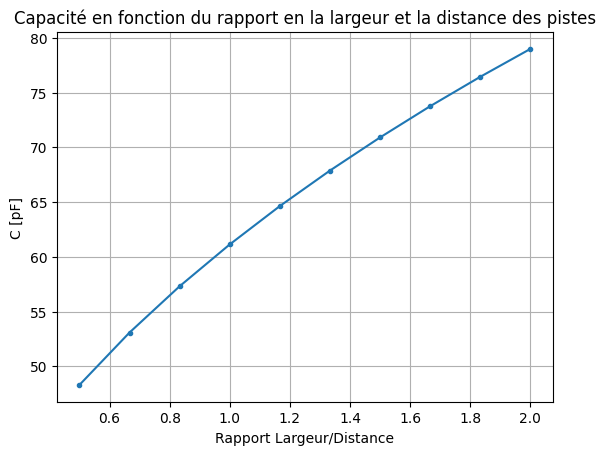

In [15]:
(piste,cair) = readExcelData('C20air.xls')

plt.figure()
plt.plot(piste,cair * 10**12,'.-')
plt.grid()
plt.ylabel('C [pF]')
plt.xlabel('Rapport Largeur/Distance')
plt.title('Capacité en fonction du rapport en la largeur et la distance des pistes')
plt.savefig('../rapport/figuresSimulation/C20airGraph.png')
plt.show()

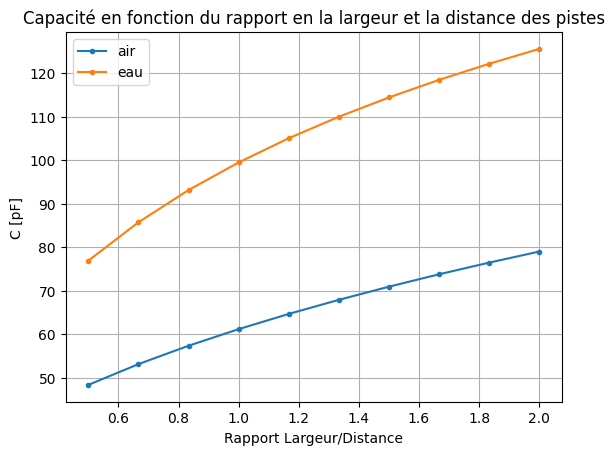

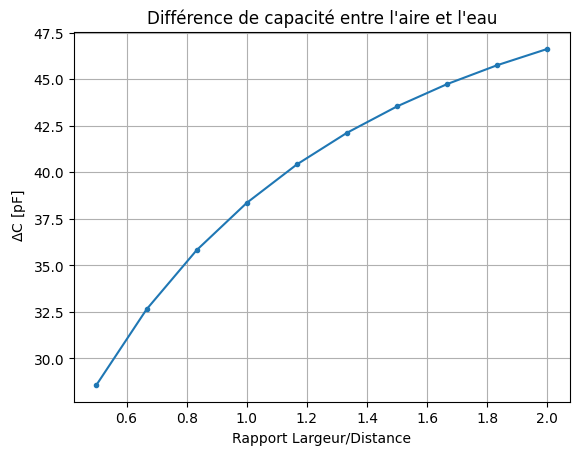

In [23]:
(piste,ceau) = readExcelData('C20eau.xls')

plotC(piste,cair,ceau,savename='../rapport/figuresSimulation/C20eauGraph')

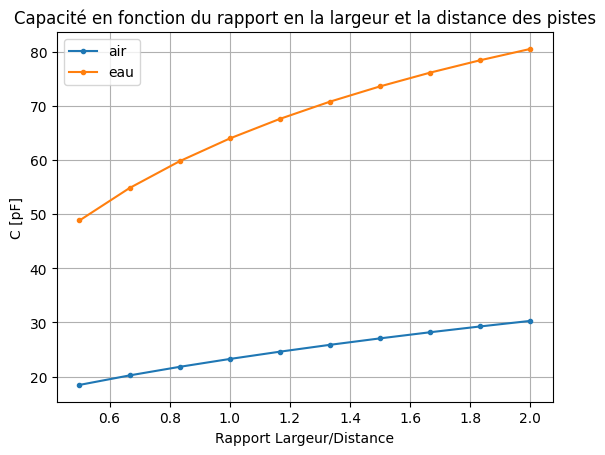

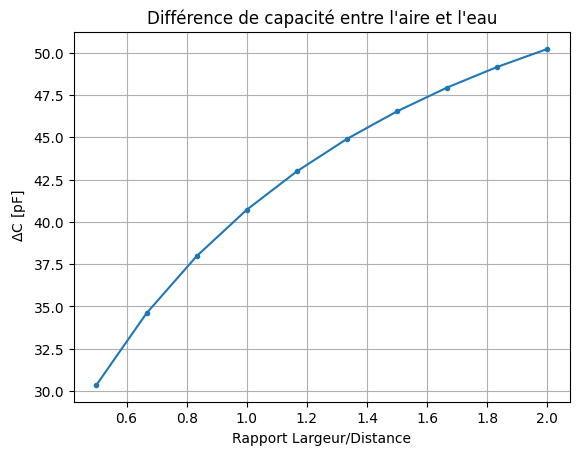

In [24]:
(piste,ceau) = readExcelData('C10eau.xls')
(piste,cair) = readExcelData('C10air.xls')

plotC(piste,cair,ceau,savename='../rapport/figuresSimulation/C10Graph')

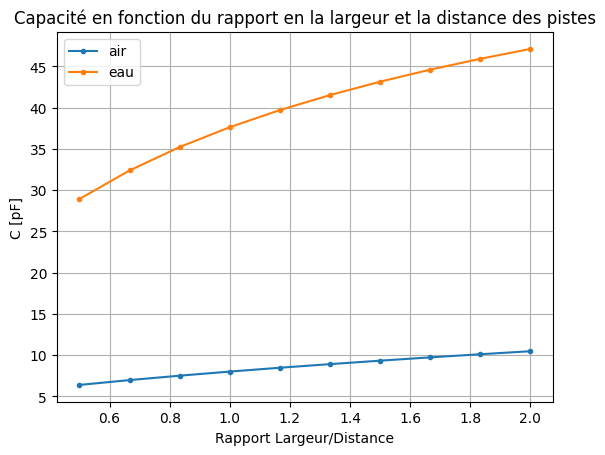

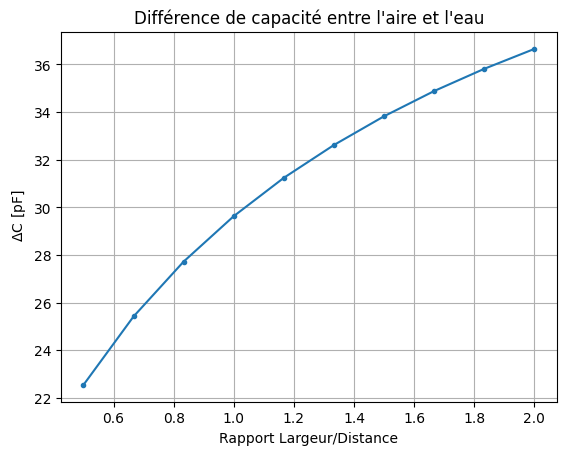

In [25]:
(piste,ceau) = readExcelData('C5eau.xls')
(piste,cair) = readExcelData('C5air.xls')

plotC(piste,cair,ceau,savename='../rapport/figuresSimulation/C5Graph')

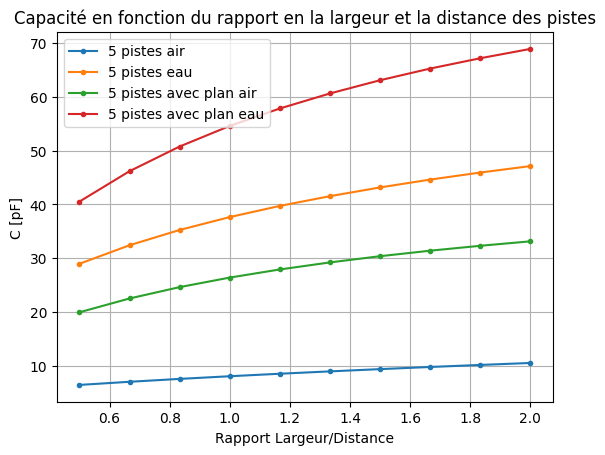

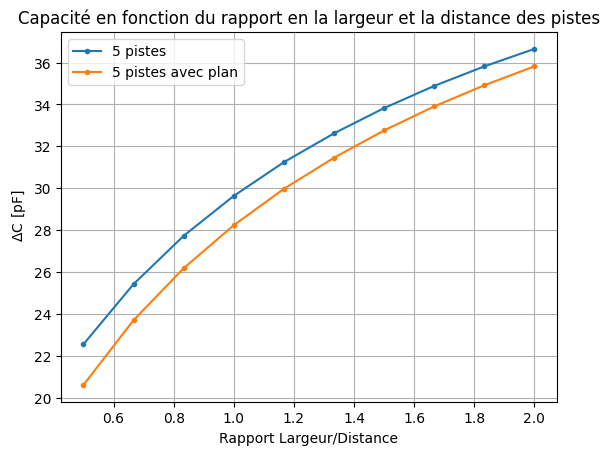

In [30]:
mesuresSet = [
('C5air.xls','C5eau.xls','5 pistes'),
('C5airMasse.xls','C5eauMasse.xls','5 pistes avec plan')
]

datasSet = []
for (nameair,nameeau,label) in mesuresSet:
    (piste,cair) = readExcelData(nameair)
    (piste,ceau) = readExcelData(nameeau)
    datasSet.append((piste,cair,ceau,label))
plotSetC(datasSet,savename='../rapport/figuresSimulation/C5masseGraph')